# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [27]:
from cs231n.data_utils import load_CIFAR10

    # Load the raw CIFAR-10 data
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

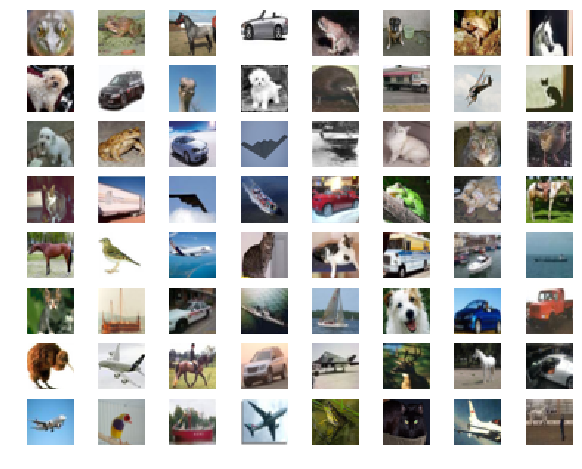

In [80]:
############################# DATA PREPROCESSING ###############################
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_mean = np.mean(X_train, axis=0).reshape(3072)
X_std = np.std(X_train, axis=0).reshape(3072)

X_trial = X_train[np.random.choice(X_train.shape[0], 64),:]

X_plot = X_trial.reshape(X_trial.shape[0],32,32,3)

#### Flatten #####
X_trial = np.reshape(X_trial, (X_trial.shape[0], -1))

#### Zero Mean ####
X_trial -= X_mean

#### Normalization ####
X_trial /= X_std

#### Principal Components Analysis ####
cov = np.dot(X_trial.T, X_trial)/X_trial.shape[0]

U, S, V = np.linalg.svd(cov)

#X_plot = X_train.reshape(X_train.shape[0], 32, 32, 3)


for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.imshow(X_plot[i,:,:,:].astype('uint8'))
    plt.imshow((X_trial[i,:]*X_std + X_mean).reshape(32,32,3).astype('uint8'))
    plt.axis('off')
    
plt.show()

(3072L, 3072L) (3072L,) (3072L, 3072L)


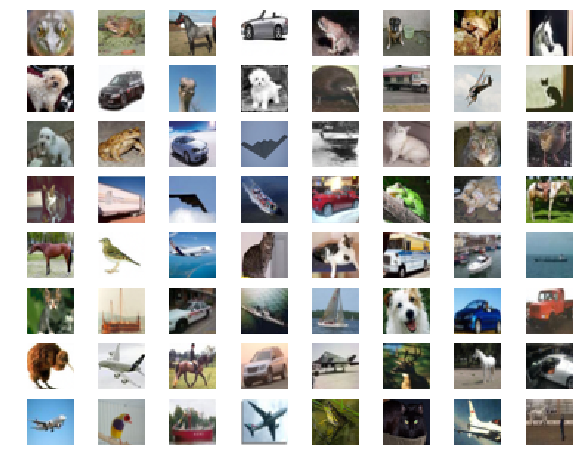

In [89]:
print(U.shape, S.shape, V.shape)

#U_red = U[:,:100] ######Keeping first 100 eigenvectors

X_rot = np.dot(X_trial, U)
X_rec = np.dot(X_rot, U.T)

X_rot_reduced = np.dot(X_trial, U[:,:144])

U_red = U
U_red[:,100:] = 0

X_rec_reduced = np.dot(X_rot_reduced, U.T[:144,:])
#X_plot = np.dot(X_rot, U.T[:100,:])

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow((X_rec_reduced[i,:]*X_std + X_mean).reshape(32,32,3).astype('uint8'))
    plt.axis('off')
    
plt.show()